<a href="https://colab.research.google.com/github/DayDreamChaser/numpyDL/blob/main/%E7%9F%A9%E9%98%B5%E8%B0%B1%E5%8D%8A%E5%BE%84%E5%92%8C%E6%A2%AF%E5%BA%A6%E6%B6%88%E5%A4%B1%E7%88%86%E7%82%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2*h)

def numerical_gradient(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # 生成和x形状相同的数组
  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x+h)的计算
    x[idx] = tmp_val + h
    fxh1 = f(x)
    # f(x-h)的计算
    x[idx] = tmp_val - h
    fxh2 = f(x)
    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 还原值

  return grad

In [ ]:
def f1(x):
  return x**2 + 2

def function_1(x):
  return 0.01*x**2 + 0.1*x

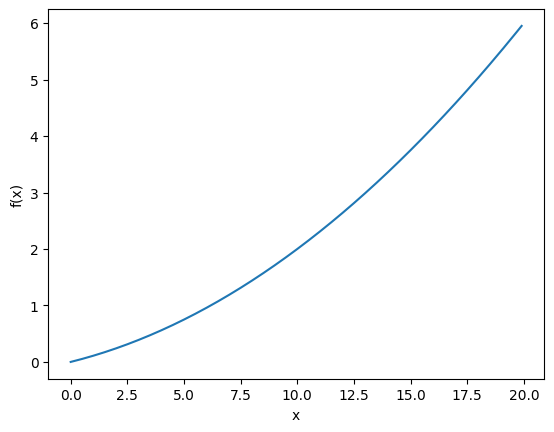

In [ ]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1) # 以0.1为单位，从0到20的数组x
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_1, 5)

0.1999999999990898

In [ ]:
np.random.randint(5)

2

In [ ]:
x = np.random.randn(3, 2)
eigenvalues, eigenvectors = np.linalg.eig(x.T @ x)
eigenvalues

array([3.69560232, 1.26577404])

In [ ]:
np.linalg.eig(x.T @ x)

LinAlgError: Last 2 dimensions of the array must be square

dh:
 [[1. 1. 1.]
 [1. 1. 1.]]
Wh:
 [[ 0.17886285  0.04365099  0.00964975]
 [-0.18634927 -0.02773882 -0.0354759 ]
 [-0.00827415 -0.06270007 -0.00438182]]
SinglarValue:
 [0.26594289 0.0610067  0.0177763 ]
dh:
 [[ 1.98001604e-18 -2.67750175e-18  1.16624752e-18]
 [ 1.98001604e-18 -2.67750175e-18  1.16624752e-18]]
norm_list: [0.4936813618915862, 0.06671409948322074, 0.009566558750746365, 0.0012559174664175227, 0.00016161552930038108, 2.0502326064585876e-05, 2.5872127013219795e-06, 3.2553722655573417e-07, 4.0909659236691936e-08, 5.137794568416934e-09, 6.45063143609667e-10, 8.097791283367736e-11, 1.0164881461403816e-11, 1.275922530897085e-12, 1.6015474028617964e-13, 2.010259784410249e-14, 2.5232663695073634e-15, 3.167184129651763e-16, 3.975421593522388e-17, 4.9899123084253356e-18]


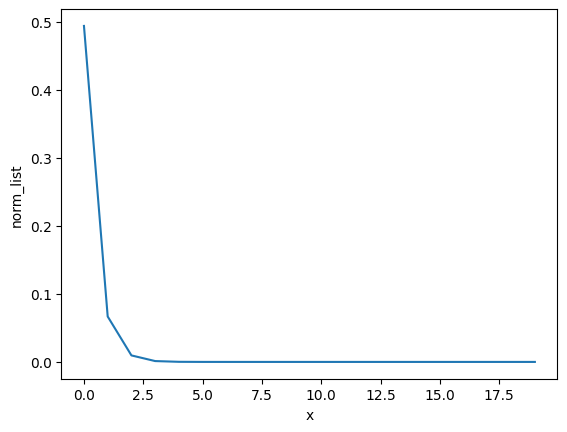

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 2 # mini-batch的大小
H = 3 # 隐藏状态向量的维数
T = 20 # 时序数据的长度
dh = np.ones((N, H))
print("dh:\n", dh)

np.random.seed(3) # 为了复现，固定随机数种子
# Wh = np.random.randn(H, H) # before
Wh = np.random.randn(H, H) * 0.1 # after
print("Wh:\n", Wh)
U, S, V = np.linalg.svd(Wh)
print("SinglarValue:\n", S)

norm_list = []

def f_norm(x):
  # F范数
  return np.sqrt(np.sum(x**2))

def l2_norm(x):
  # 谱范数(矩阵的最大的 谱半径/奇异值)
  eigenvalue, featurevector = np.linalg.eig(x.T @ x)
  lambda_x = max(eigenvalue) ** (0.5)
  return lambda_x

for t in range(T):
  dh = np.dot(dh, Wh.T)
  norm = f_norm(dh)
  # norm = l2_norm(dh)
  norm_list.append(norm)

print("dh:\n", dh)
print("norm_list:", norm_list)

plt.xlabel("x")
plt.ylabel("norm_list")
plt.plot(np.arange(0, T, 1), norm_list)
plt.show()

In [ ]:
print(l2_norm(dh))
print(f_norm(dh))

498.991230842534
498.991230842534


In [ ]:
N, M = 3, 3
# x = np.ones((N, M))
x = np.eye(N, dtype=int)
print("x:\n", x)

U, S, V = np.linalg.svd(x)
print(U, S, V)
# print(V)

x:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] [1. 1. 1.] [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
Wh.shape

(3, 3)

In [ ]:
import numpy as np
dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0

def clip_grads(grads, max_norm):
  total_norm = 0
  for grad in grads:
    total_norm += np.sqrt(np.sum(grad**2))
  total_norm = np.sqrt(total_norm)

  rate = max_norm / (total_norm + 1e-6)
  print("rate: ", rate)
  if rate < 1:
    for idx, grad in enumerate(grads):
      grads[idx] = grads[idx] * rate
  return grads

print(grads)
clip_grads(grads, max_norm)

[array([[2.0937335 , 7.30708124, 6.5112277 ],
       [4.78978297, 2.74780505, 6.52223125],
       [9.56449511, 4.35520556, 0.70132505]]), array([[0.57731488, 0.82871019, 9.59707187],
       [5.40760836, 8.37462433, 1.70033544],
       [2.60345073, 6.91977512, 8.95570328]])]
rate:  0.8447973208196773


[array([[1.76878045, 6.17300266, 5.50066772],
        [4.04639582, 2.32133835, 5.50996349],
        [8.08005985, 3.67926599, 0.59247752]]),
 array([[0.48771406, 0.70009215, 8.10758061],
        [4.56833306, 7.07486019, 1.43643883],
        [2.1993882 , 5.84580748, 7.56575414]])]